## Project 1d: Evolution of antibiotic resistance
### Mimi Filova | Statistical Biophysics | Summer 2023

Use the experimentally determined fitness landscapes from <a href="https://www.science.org/doi/abs/10.1126/science.1123539">Weinrich et al (2006)</a> to simulate the evolution of antibiotic resistance and to study pathways of evolution on that landscape. <br> N.B. Here fitness is not given by the growth rate directly

### Summary of <a href="https://www.science.org/doi/abs/10.1126/science.1123539">Weinrich et al (2006)</a> 

* experimental paper, looks at mutations of a gene [the $\beta$-lactamase allele] in bacteria [type]
* $\beta$-lactamase governs how bacteria responds to the presence of an ($\beta$-lactame) antibiotic
* antibiotic-resistant vs wild type comparison yields: 5 point (SNP) mutations on the gene of interest
* with all 5 mutations, bacterias are resistant to antibiotics about 10^5 times more
* note: antibiotics either kill or stop growth of bacteria

### mutations & pathways
summary: 5 mutation points; 32 combinations of mutations; 120 pathways for them to emerge.
* 5 point mutations, with each having 2 options
* total of 2^5 = 32 sequences possible
* mutating one by one, 5 * 4 * 3 *... = 5! = 120 ways to get to final mutation
* strong selection / slow mutation model 




In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

### experiment (MIC for each combo)
* prepared a sample for each of the 32 combinations
* for each sample, varied the concentration of antibiotic
* found the MIC - minimum inhibitory concentration, at which cell number stops growing
* experiment is done s.t. in petri dish we can only measure N of cells

In [13]:
# constants

# data from paper

# experimentally measured, order is as given in paper by binary 00001 etc order
MIC = np.array(
    [0.088, 0.088, 1.4, 1.4, 0.063, 0.088, 32, 360,
     0.13, 0.18, 360, 360, 0.18, 0.18, 360, 2100,
     0.088, 0.088, 23, 360, 1.4, 0.088, 360, 360,
     1.4, 2.0, 2100, 1500, 0.80, 1.4, 2900, 4100]
)

#32 mutations combos code
mutations_32  = [ '00000','00001','00010','00011','00100','00101','00110','00111',
                  '01000','01001','01010','01011','01100','01101','01110','01111',
                  '10000','10001','10010','10011','10100','10101','10110','10111',
                  '11000','11001','11010','11011','11100','11101','11110','11111']

#mutation names, order as in binary code
mutations_code = ['A42G','E104K','M182T','G238S','g4205a']

# parameters

# growth rates at no antibiotic
g0 = np.array([1.]*len(MIC))
# don't want all combos to be equally growing at ant = 0? change g0 here

### Info
* antibiotic: cefotaxime, third-generation cephalosporin B-lactam
* gene TEM^wt vs evolved, antibiotic resistant gene TEM* with 5 mutations
* 4 missense mutations at clinically relevant residues (A42G, E104K, M182T, G238S)
* 1 noncoding mutation (g4205a)

In [14]:
# functions

# growth rate generate

def f_growth(c=None,MIC=None, g0=None):
    # growth rate (antibiotic concentration)
    # don't want linear growth rate? change this return eqn
    return -1/MIC*c+g0

def get_mu(mu=None):
    # no death
    for i in range(0,len(mu)):
        if mu[i] < 0: mu[i] = 0
    return mu

### Diff Eqn for growth

$ x = 5 /beta \Beta $

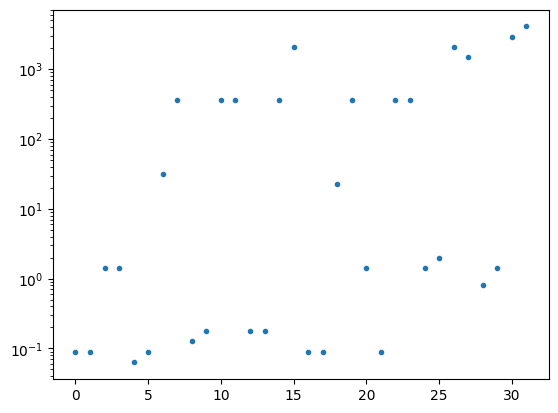

In [16]:
# sanity checks & all
plt.plot(MIC,'.')
plt.yscale('log')
plt.show()

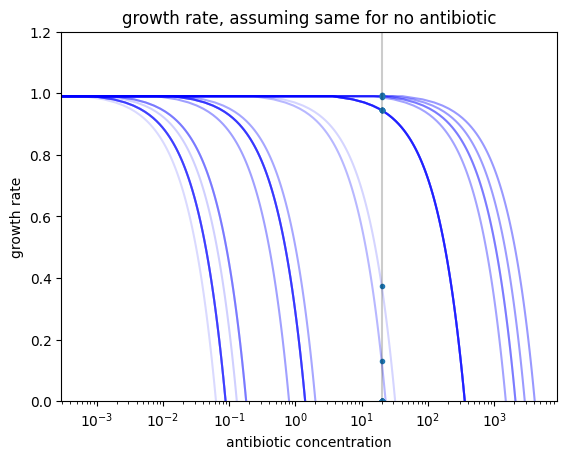

In [20]:
# visualize growth rate

i=1
# plot growth rate (concentration)
for m,g in zip(MIC,g0):
    # for each sequence combo
    c = np.linspace(0,m,100)
    plt.plot(c,f_growth(c,m,g),c='blue',alpha=0.1+i/32*0.3)
    i+=1 # for line colors

plt.xlabel('antibiotic concentration')
plt.ylabel('growth rate')
plt.ylim(0,1.2)
plt.title('growth rate, assuming same for no antibiotic')
plt.xscale('log')

# fixed c; what are the growth rates?
c = 20
mu = get_mu(f_growth(c,MIC,g0))
# mu is growth rates for each mutation at antibiotic conc c

plt.plot([c]*len(MIC),mu,'.')

plt.vlines(c,0,1.2,'k',alpha=0.2)

plt.show()

In [ ]:
# visualize MIC fitness landscape
